#Sentiment Analysis using DistilBERT

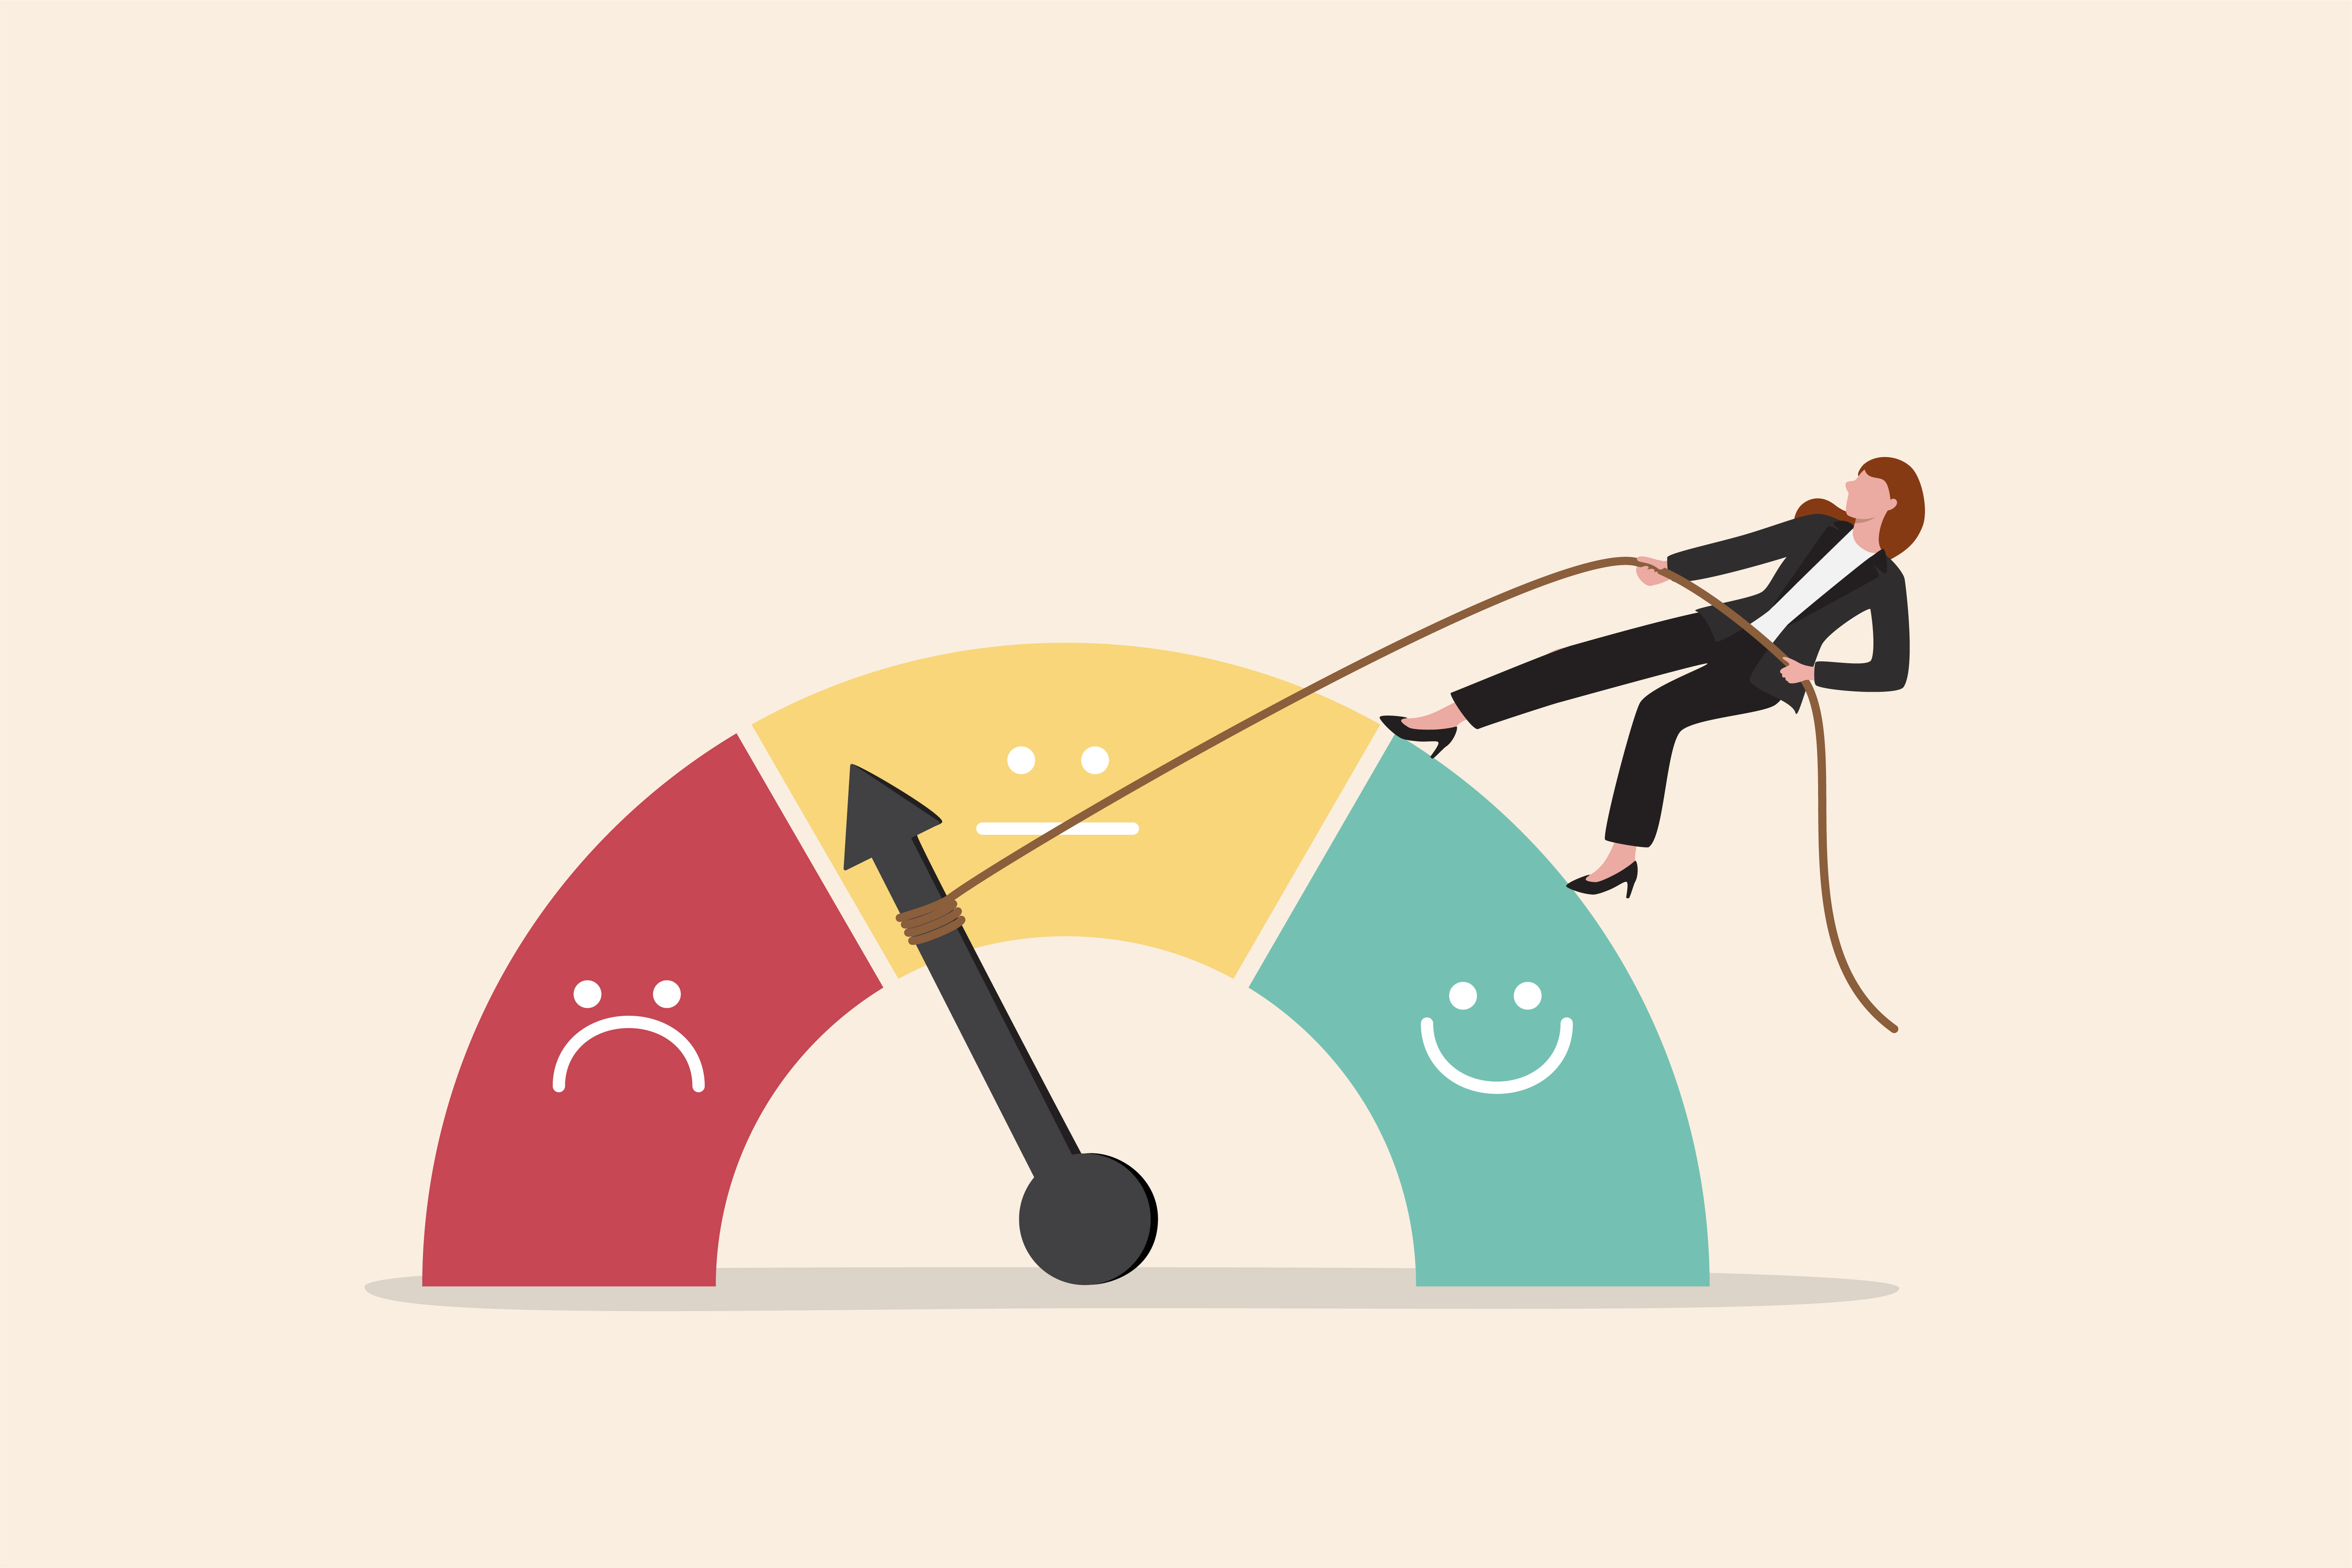

To import the DistilBERT model in Python, you can use the Hugging Face transformers library, which provides a convenient interface to work with various pre-trained transformer models, including DistilBERT. First, you need to install the library:

For this, we'll use the pipeline module from the transformers library, which provides a convenient way to perform various NLP tasks, including sentiment analysis:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%pip install wordcloud matplotlib
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load CSV file into a DataFrame without header
df = pd.read_csv("ch4_feedback_data.csv", header=None)

In [3]:
df.head()

,0,1
0,Your products are excellent. I really love the...,delivery to my location in Los Angeles was a ...
1,The customer service team in New York was help...,NaN
2,The new features in the latest release are fan...,NaN
3,The product didn't meet my expectations,and I'm disappointed. I hope you can address ...
4,Your products are not good. I really don't lik...,delivery to my location in Los Angeles was a ...


#Exercise #1: Load Pre-Trained DistilBERT model and Tokenizer

In [4]:
# install the required libraries
%pip install transformers
%pip install torch


# Import necessary libraries
from transformers import pipeline, DistilBertModel, DistilBertTokenizer

# Load pre-trained DistilBERT model and tokenizer
model = DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


  Using cached transformers-4.44.2-py3-none-any.whl.metadata (43 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached huggingface_hub-0.25.1-py3-none-any.whl.metadata (13 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached safetensors-0.4.5-cp312-none-win_amd64.whl.metadata (3.9 kB)
  Using cached tokenizers-0.19.1-cp312-none-win_amd64.whl.metadata (6.9 kB)
  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
Using cached transformers-4.44.2-py3-none-any.whl (9.5 MB)
Using cached huggingface_hub-0.25.1-py3-none-any.whl (436 kB)
Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl (156 kB)
Using cached safetensors-0.4.5-cp312-none-win_amd64.whl (286 kB)
Using cached tokenizers-0.19.1-cp312-none-win_amd64.whl (2.2 MB)
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
Using cached fsspec-2024.9.0-py3-none-any.whl (179 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached to

e:\Johni\Python Projects\natural language processing\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\Johni\Python Projects\natural language processing\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


#Exercise #2: Load DistilBERT Sentiment Analysis Pipeline

In [9]:
# EXERCISE - COMPLETE THE CODE
import os

# Load DistilBERT sentiment analysis pipeline also define model to be used as multilingual-uncased-sentiment
bert_sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


# Iterate over the rows in df variable and perform sentiment analysis with DistilBERT
sentiment_results_bert = []
for index, row in df.iterrows():
    text = row[0]  # Access the first column
    bert_result = bert_sentiment_analysis(text)[0] # perform sentiment analysis here
    sentiment_label_bert = bert_result['label'] # get the label
    sentiment_score_bert = bert_result['score'] # get the score
    sentiment_results_bert.append({"Text": text, "Sentiment Score": sentiment_score_bert, "Sentiment Label": sentiment_label_bert})



# Iterate over the sentiment results and print each entry
for result in sentiment_results_bert:
    print(f"Text: {result['Text']}")
    print(f"Sentiment Score: {result['Sentiment Score']}")
    print(f"Sentiment Label: {result['Sentiment Label']}")
    print("\n")


# Convert DistilBERT sentiment results to DataFrame
sentiment_df_bert = pd.DataFrame(sentiment_results_bert)

# Save DistilBERT sentiment results to a new CSV file
if os.path.exists("sentiment_results_bert.csv"):
    os.remove("sentiment_results_bert.csv")
    print("The file sentiment_results_bert.csv has been deleted successfully.")
sentiment_df_bert.to_csv("sentiment_results_bert.csv", index=False)


Text: Your products are excellent. I really love the quality! However
Sentiment Score: 0.5744266510009766
Sentiment Label: 5 stars


Text: The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment Score: 0.5543173551559448
Sentiment Label: 4 stars


Text: The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment Score: 0.8357025384902954
Sentiment Label: 5 stars


Text: The product didn't meet my expectations
Sentiment Score: 0.4780275821685791
Sentiment Label: 2 stars


Text: Your products are not good. I really don't like the quality! However
Sentiment Score: 0.5138058662414551
Sentiment Label: 2 stars


Text: The customer service team in San Francisco was not helpful in resolving my issue. But
Sentiment Score: 0.5047702789306641
Sentiment Label: 3 stars


Text: The new features in the latest release are not fantastic! They have not greatly impr

#Exercise #3 (Optional): Exploratory Data Analysis

In [10]:
sentiment_df_bert.head()

,Text,Sentiment Score,Sentiment Label
0,Your products are excellent. I really love the...,0.574427,5 stars
1,The customer service team in New York was help...,0.554317,4 stars
2,The new features in the latest release are fan...,0.835703,5 stars
3,The product didn't meet my expectations,0.478028,2 stars
4,Your products are not good. I really don't lik...,0.513806,2 stars


Word Cloud

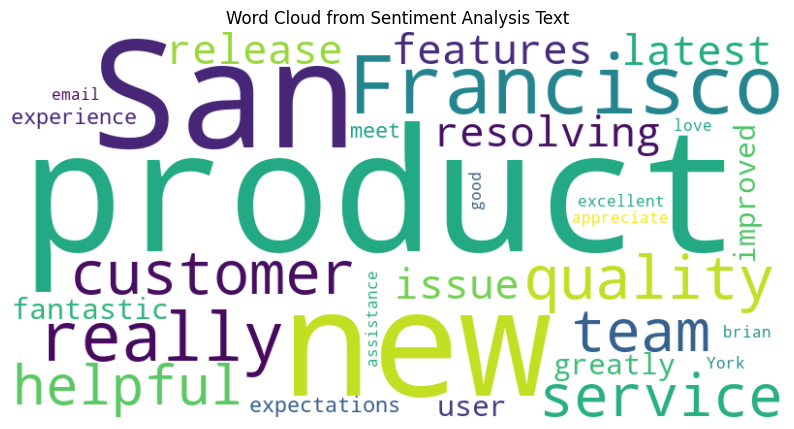

In [11]:
from wordcloud import WordCloud


# Assuming you have already performed sentiment analysis and have sentiment_df_bert DataFrame

# Combine all text data into a single string for word cloud generation
text_combined = ' '.join(sentiment_df_bert['Text'])

# Create a WordCloud object with specific settings (e.g., background color, colormap)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_combined)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes for better visualization
plt.title('Word Cloud from Sentiment Analysis Text')
plt.show()


Pie Chart

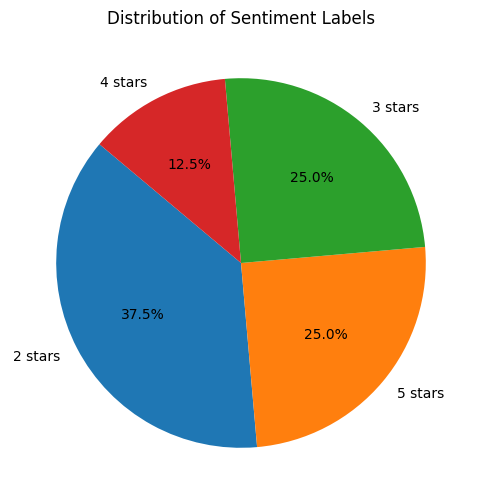

In [12]:
# Count the occurrences of each sentiment label
sentiment_label_counts = sentiment_df_bert['Sentiment Label'].value_counts()

# Plotting pie chart for sentiment labels
plt.figure(figsize=(8, 6))
plt.pie(sentiment_label_counts, labels=sentiment_label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Labels')
plt.show()



Bar Chart

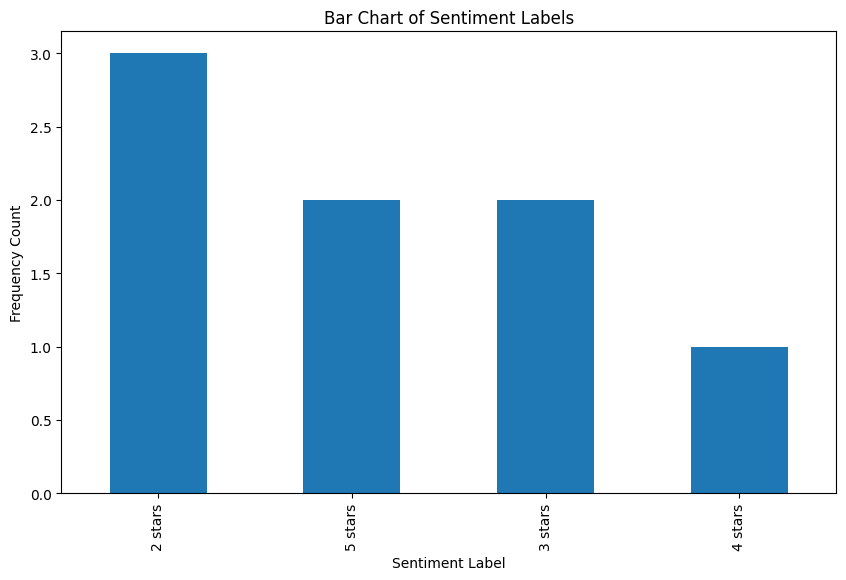

In [13]:
# Count the occurrences of each sentiment label for visualization
sentiment_label_counts = sentiment_df_bert['Sentiment Label'].value_counts()

# Plotting stacked bar chart for sentiment labels
plt.figure(figsize=(10, 6))
sentiment_label_counts.plot(kind='bar', stacked=True)
plt.title('Bar Chart of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency Count')
plt.show()
